In [35]:
from pipelines.inference import FaceDiffusionInferencePipeline
from model.vae.vae import VAE
from model.unet.facediffusion_unet import FaceDiffusionUNet
import torch

In [36]:
vae = VAE()
vae.load_state_dict(torch.load("../runs/vae_base_nighttune/vae.safetensors"))
vae.eval()
unet = FaceDiffusionUNet()
unet.load_state_dict(torch.load("../runs/guided9/unet.safetensors"))
unet.eval()


pipeline = FaceDiffusionInferencePipeline(
    vae=vae,
    unet=unet,
    device='cuda'
)

In [82]:
prompt = "Handsome and formal mid aged man with serious look on his face and impressive beard"

images = pipeline.generate(
    prompt,
    30,
    cfg_scale=1.5
)

  0%|          | 0/30 [00:00<?, ?it/s]

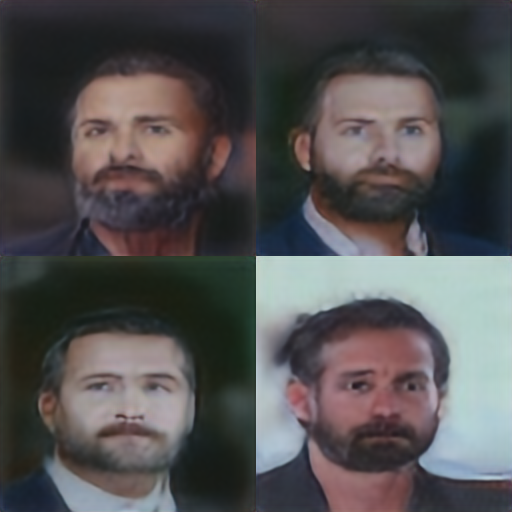

In [83]:
from diffusers.utils import make_image_grid

make_image_grid(images, rows=2, cols=2)